In [2]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

In [3]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet_g')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
file1 = ["$HOME/EIC/output/102.root"]
a = getData(file1)


Processed $HOME/EIC/output/102.root in 56.4 seconds


In [5]:
file2 = ["$HOME/EIC/output/1010.root"]
b = getData(file2)


Processed $HOME/EIC/output/1010.root in 66.1 seconds


In [6]:
file3 = ["$HOME/EIC/output/126.root"] # high Q2 E scheme
c = getData(file3)


Processed $HOME/EIC/output/126.root in 76.0 seconds


In [7]:
file4 = ["$HOME/EIC/output/125.root"] # high Q2 WTA scheme
d = getData(file4)


Processed $HOME/EIC/output/125.root in 76.5 seconds


In [8]:
aa = applyCut(a, '5 < pt_electron < 20', '5 < pt_electron < 20')
aa = applyCut(aa, 'pt_jet > 4', 'pt_jet > 4')
aa = applyCut(aa, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
aa = fixPhi(aa, 'photon')
aa.eval('nu = 0.533*Q2/x',inplace=True)

5 < pt_electron < 20 800523  fraction kept: 2.2
pt_jet > 4 198300  fraction kept: 24.8
0.1 < y < 0.85 94524  fraction kept: 47.7
Fixed photon phi range
Fixed photon delta phi range


In [9]:
bb = applyCut(b, '5 < pt_electron < 20', '5 < pt_electron < 20')
bb = applyCut(bb, 'pt_jet > 4', 'pt_jet > 4')
bb = applyCut(bb, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
bb = fixPhi(bb, 'photon')
bb.eval('nu = 0.533*Q2/x',inplace=True)

5 < pt_electron < 20 818856  fraction kept: 2.2
pt_jet > 4 201283  fraction kept: 24.6
0.1 < y < 0.85 95866  fraction kept: 47.6
Fixed photon phi range
Fixed photon delta phi range


In [10]:
cc = applyCut(c, 'pt_jet > 4', 'pt_jet > 4')
cc = applyCut(cc, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
cc = fixPhi(cc, 'photon')
cc.eval('nu = 0.533*Q2/x',inplace=True)

pt_jet > 4 8420344  fraction kept: 19.3
0.1 < y < 0.85 4463800  fraction kept: 53.0
Fixed photon phi range
Fixed photon delta phi range


In [11]:
dd = applyCut(d, '20 < pt_electron < 35', '20 < pt_electron < 35')
dd = applyCut(dd, 'pt_jet > 4', 'pt_jet > 4')
dd = applyCut(dd, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
dd = fixPhi(dd, 'photon')
dd.eval('nu = 0.533*Q2/x',inplace=True)

20 < pt_electron < 35 124192  fraction kept: 0.3
pt_jet > 4 35919  fraction kept: 28.9
0.1 < y < 0.85 35489  fraction kept: 98.8
Fixed photon phi range
Fixed photon delta phi range


In [12]:
df1 = applyCut(aa, '5 < pt_electron < 10', '5 < pt_electron < 10')
df2 = applyCut(aa, '10 < pt_electron < 20', '10 < pt_electron < 20')
df3 = applyCut(cc, '20 < pt_electron < 35', '20 < pt_electron < 35')
df4 = applyCut(bb, '5 < pt_electron < 10', '5 < pt_electron < 10')
df5 = applyCut(bb, '10 < pt_electron < 20', '10 < pt_electron < 20')
df6 = applyCut(dd, '20 < pt_electron < 35', '20 < pt_electron < 35')

5 < pt_electron < 10 78713  fraction kept: 83.3
10 < pt_electron < 20 15811  fraction kept: 16.7
20 < pt_electron < 35 35190  fraction kept: 0.8
5 < pt_electron < 10 79951  fraction kept: 83.4
10 < pt_electron < 20 15915  fraction kept: 16.6
20 < pt_electron < 35 35489  fraction kept: 100.0


In [13]:
print np.mean(keepOneJet(df1)['x']), np.mean(keepOneJet(df2)['x']), np.mean(keepOneJet(df3)['x'])
print np.mean(keepOneJet(df4)['x']), np.mean(keepOneJet(df5)['x']), np.mean(keepOneJet(df6)['x'])


Remove extra jets 73023  fraction kept: 92.8
0.037590083 
Remove extra jets 14667  fraction kept: 92.8
0.13427483 
Remove extra jets 33807  fraction kept: 96.1
0.35356778

Remove extra jets 73800  fraction kept: 92.3
0.037456285 
Remove extra jets 14667  fraction kept: 92.2
0.13427483 
Remove extra jets 33807  fraction kept: 95.3
0.35356778


In [14]:
print np.mean(keepOneJet(df1)['nu']), np.mean(keepOneJet(df2)['nu']), np.mean(keepOneJet(df3)['nu'])
print np.mean(keepOneJet(df4)['nu']), np.mean(keepOneJet(df5)['nu']), np.mean(keepOneJet(df6)['nu'])


Remove extra jets 73023  fraction kept: 92.8
1150.2709 
Remove extra jets 14667  fraction kept: 92.8
1177.8379 
Remove extra jets 33807  fraction kept: 96.1
1463.2068

Remove extra jets 73800  fraction kept: 92.3
1150.7997 
Remove extra jets 14667  fraction kept: 92.2
1177.8379 
Remove extra jets 33807  fraction kept: 95.3
1463.2068


In [21]:
def plot_dphi(df_array, label_array, color_array):
    fig = plt.hist(df_array[0]['delta_phi_photon_abs'], label=label_array[0], range=(0,0.5), bins=25, histtype='step', fill=True, alpha=0.5, stacked=True, normed=True, color=color_array[0], linewidth=2)
    fig = plt.hist(df_array[1]['delta_phi_photon_abs'], label=label_array[1], range=(0,0.5), bins=25, histtype='step', hatch='/', stacked=True, normed=True, color=color_array[1], linewidth=2)  
    return fig

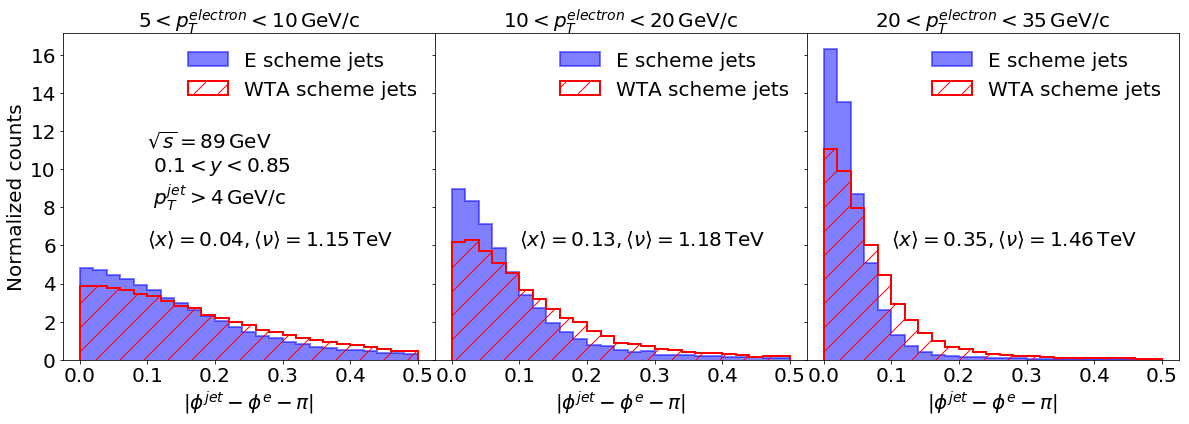

In [22]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1 = plt.subplot(131)
plot_dphi([df1,df4], ['E scheme jets','WTA scheme jets'], ['b','r'])
plt.xlabel('$|\phi^{jet}-\phi^e-\pi|$', fontsize=20)
plt.ylabel('Normalized counts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.1,6, r'$\langle x \rangle = 0.04, \langle \nu \rangle = 1.15 \, \mathrm{TeV}$', fontsize=20)
plt.text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.title('$5 < p_T^{electron} < 10 \, \mathrm{GeV/c}$', fontsize=20)

ax2 = plt.subplot(132, sharey=ax1)
plot_dphi([df2,df5], ['E scheme jets','WTA scheme jets'], ['b','r'])
plt.xlabel('$|\phi^{jet}-\phi^e-\pi|$', fontsize=20)
plt.xticks(fontsize=20)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(0.1,6, r'$\langle x \rangle = 0.13, \langle \nu \rangle = 1.18 \, \mathrm{TeV}$', fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.title('$10 < p_T^{electron} < 20 \, \mathrm{GeV/c}$', fontsize=20)

ax3 = plt.subplot(133, sharey=ax1)
plot_dphi([df3,df6], ['E scheme jets','WTA scheme jets'], ['b','r'])
plt.xlabel('$|\phi^{jet}-\phi^e-\pi|$', fontsize=20)
plt.xticks(fontsize=20)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.text(0.1,6, r'$\langle x \rangle = 0.35, \langle \nu \rangle = 1.46 \, \mathrm{TeV}$', fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.title('$20 < p_T^{electron} < 35 \, \mathrm{GeV/c}$', fontsize=20)

plt.savefig('images/dphi_big_bin.pdf', bbox_inches='tight')